In [ ]:
!nvidia-smi

Thu Sep  7 16:22:45 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   58C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Install basic toolkit 

In [ ]:
!pip install -qq diffusers==0.14.0 transformers xformers git+https://github.com/huggingface/accelerate.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 737.4/737.4 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.0/167.0 MB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 107.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 72.9 MB/s eta 0:00:00


In [ ]:
import requests
import torch
from PIL import Image
from io import BytesIO

from diffusers import DiffusionPipeline, StableDiffusionImg2ImgPipeline

In [ ]:
device = "cuda"
pipe = StableDiffusionImg2ImgPipeline.from_pretrained("zhyemmmm/ToonYou")
pipe = pipe.to(device)

unet/diffusion_pytorch_model.safetensors not found


Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(
The config attributes {'addition_embed_type': None, 'addition_embed_type_num_heads': 64, 'class_embeddings_concat': False, 'cross_attention_norm': None, 'encoder_hid_dim': None, 'mid_block_only_cross_attention': None, 'resnet_out_scale_factor': 1.0, 'resnet_skip_time_act': False, 'time_embedding_act_fn': None, 'time_embedding_dim': None} were passed to UNet2DConditionModel, but are not expected and will be ignored. Please verify your config.json configuration file.


In [ ]:
url = "https://media.discordapp.net/attachments/1092064974794391644/1194982468982427648/2c809fbfcb030dd8a97af3759f37ee29.png?ex=65b25526&is=659fe026&hm=93a959e1c5b1442d66dec7303e3a6ec48ea8e419e2c6ff0d7a580780b5bdd201&=&format=webp&quality=lossless&width=1041&height=1006"#
response = requests.get(url)
init_image = Image.open(BytesIO(response.content)).convert("RGB")
init_image = init_image.resize((512, 512))

prompt = "1girl, fashion photography"

images = []

for strength in [0.05, 0.15, 0.25, 0.35, 0.5, 0.75]:
  image = pipe(prompt=prompt, image=init_image, strength=strength, guidance_scale=7.5).images[0]
  images.append(image)

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/37 [00:00<?, ?it/s]

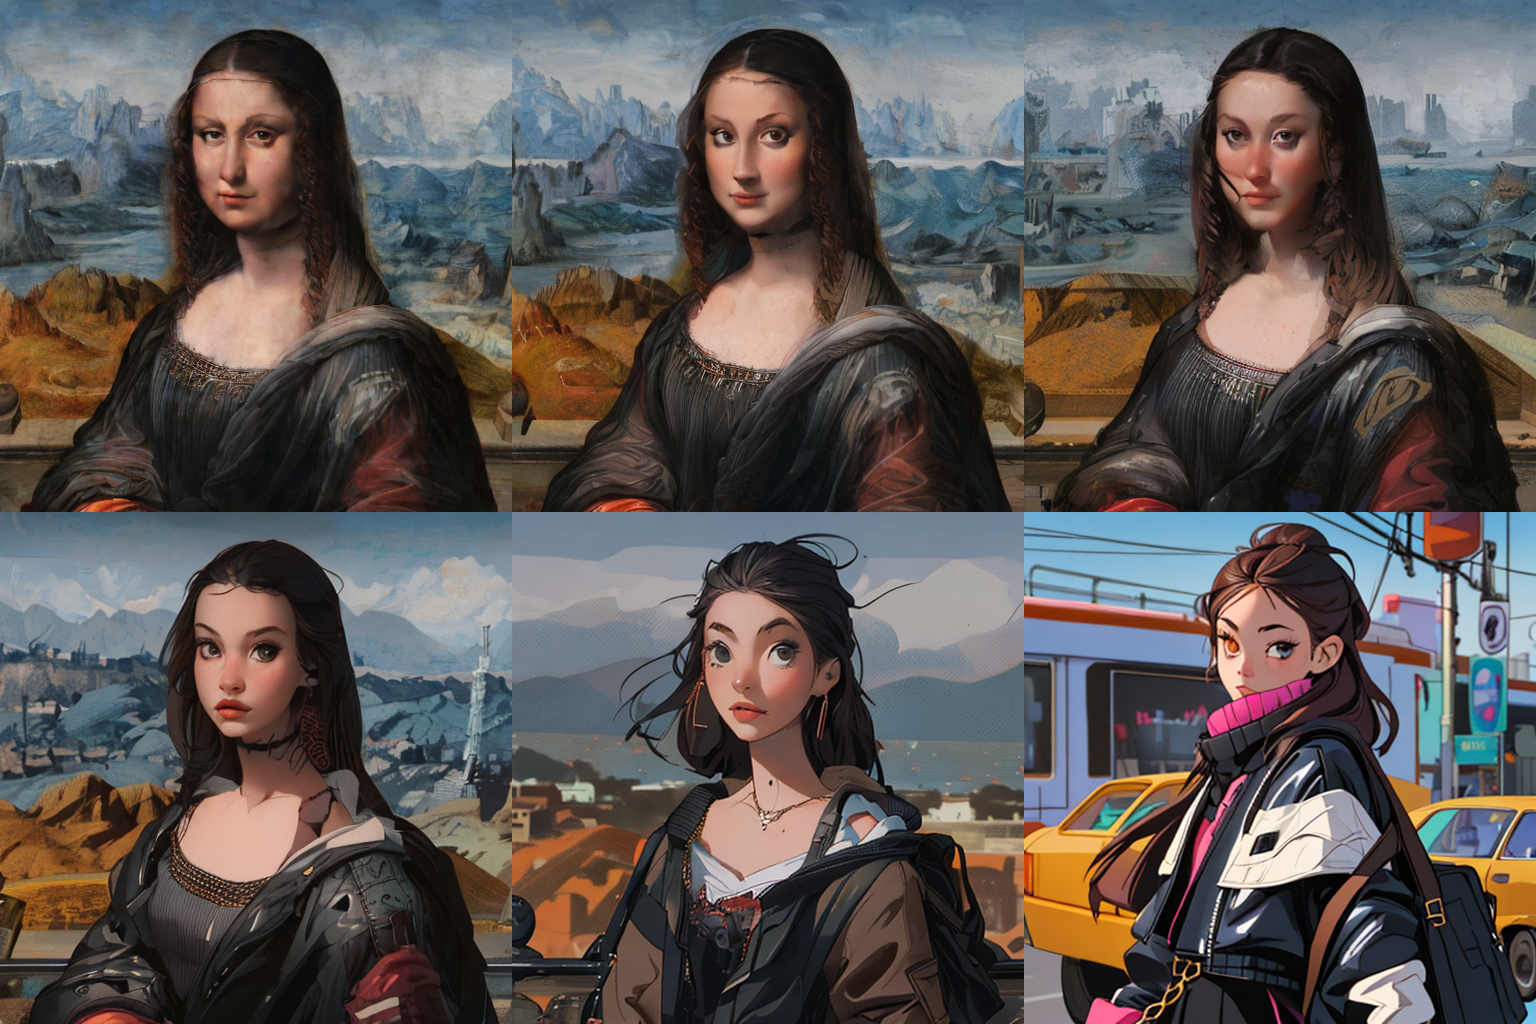

In [ ]:
# For displaying images
def image_grid(imgs, rows, cols):
    assert len(imgs) == rows * cols

    w, h = imgs[0].size
    grid = Image.new("RGB", size=(cols * w, rows * h))
    grid_w, grid_h = grid.size

    for i, img in enumerate(imgs):
        grid.paste(img, box=(i % cols * w, i // cols * h))
    return grid

image_grid(images, 2, 3)

## Change SemiRealMix model

In [ ]:
pipe = StableDiffusionImg2ImgPipeline.from_pretrained("robotjung/SemiRealMix")
pipe = pipe.to(device)

unet/diffusion_pytorch_model.safetensors not found


Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


In [ ]:
prompt = "1girl, robot"

images = []

for strength in [0.05, 0.15, 0.25, 0.35, 0.5, 0.75]:
  image = pipe(prompt=prompt, image=init_image, strength=strength, guidance_scale=7.5).images[0]
  images.append(image)

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/37 [00:00<?, ?it/s]

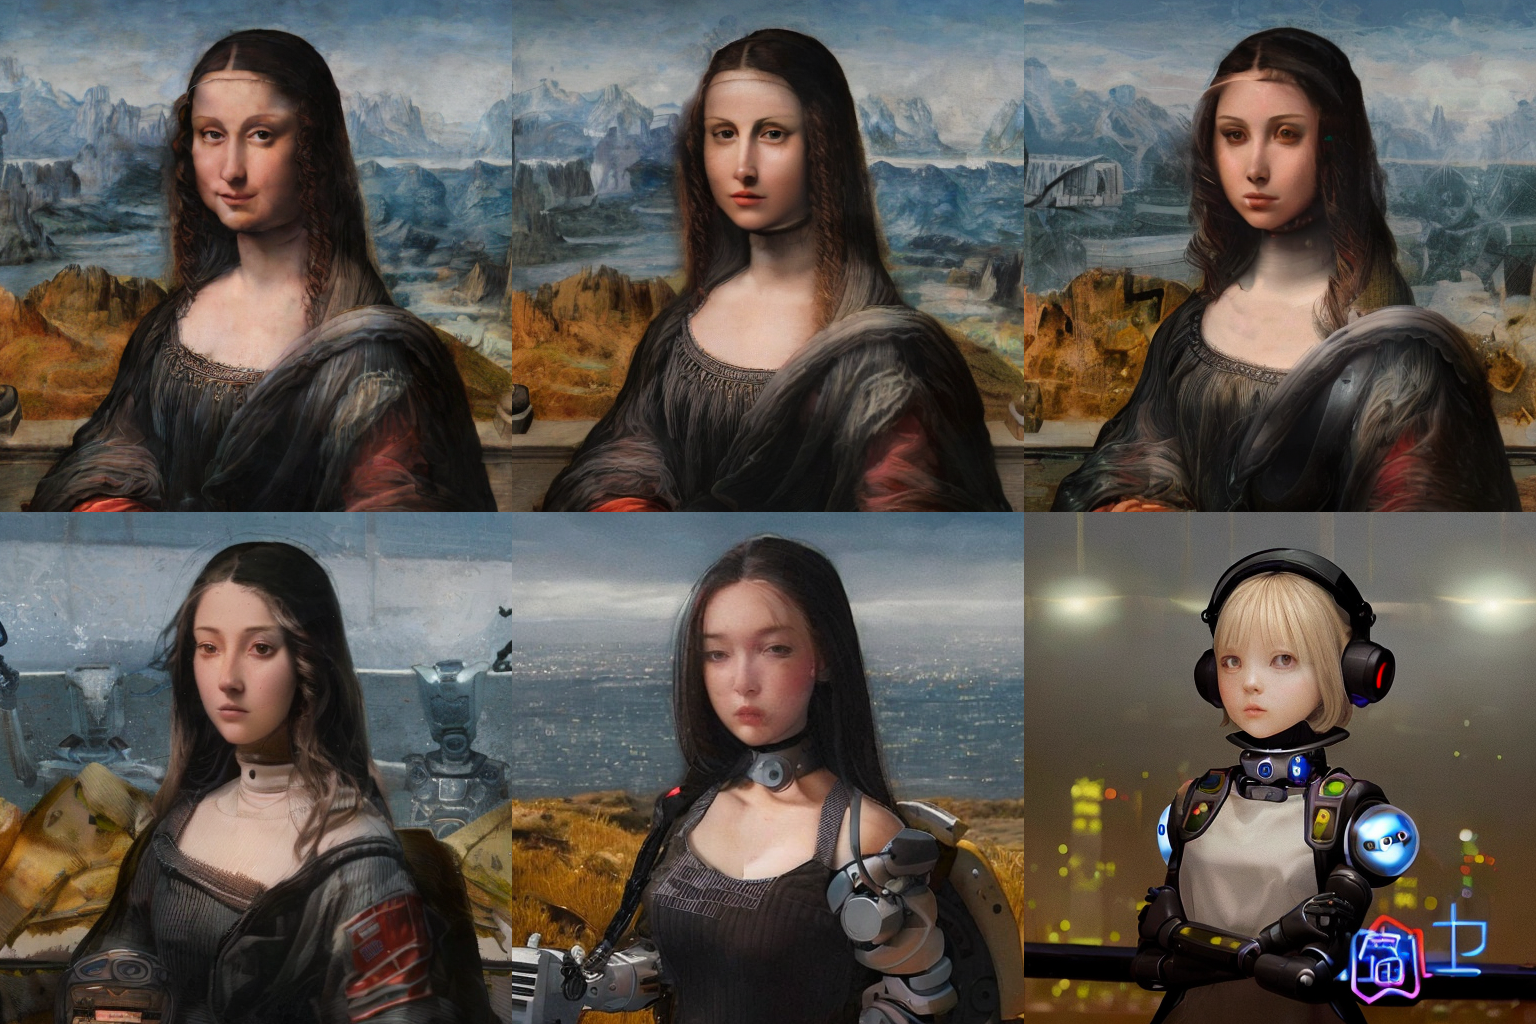

In [ ]:
image_grid(images, 2, 3)